In [ ]:
!wget https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/train.csv
!wget https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/test.csv

In [2]:
import pandas as pd
datas = pd.read_csv('train.csv', encoding='utf-8')
predicts = pd.read_csv('test.csv', encoding='utf-8')

In [3]:
combine = pd.concat([datas, predicts], ignore_index=True)
combine = combine.drop(['PassengerId', 'Survived'], axis=1)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 處理 Cabin 欄位
def change(c):
    if pd.isna(c):
        return c
    else:
        return c[0]

combine['Cabin'] = combine['Cabin'].apply(change)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 處理 Name 欄位
def change(n):
    if pd.isna(n):
        return n
    else:
        return n.split('.')[0].split(',')[-1].strip()

combine['Name'] = combine['Name'].apply(change)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# 處理 Ticket 欄位
count = combine['Ticket'].value_counts()
def change(t):
    if pd.isna(t):
        return t
    else:
        return count[t]

combine['Ticket'] = combine['Ticket'].apply(change)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [7]:
# 檢查缺失值
s = combine.isna().sum()
s[s>0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [8]:
# 填補缺失值(針對類別型特徵填補眾數)
# 不能有空的值: 補一個最有可能的值
# 類別值(固定數種): Embarked, Pclass, Name, Sex, Cabin。最常出現的值
# 數值(無限多可能): Age, SibSp, Parch, Ticket, Fare。中間值(中位數)
mostidx = combine['Embarked'].value_counts().idxmax()
combine['Embarked'].fillna(mostidx, inplace=True)

In [45]:
# f = combine.groupby('Pclass')['Fare'].median()
# combine.loc[combine['Fare'].isna() & combine['Pclass']==3, 'Fare'] = f[3]

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [9]:
# 填補缺失值(針對數值型特徵填補中位數)
med = combine.median().drop('Pclass')
combine = combine.fillna(med)
combine

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [10]:
# 處理 Name 欄位。Name 欄位直接做 OneHotEncoding 沒有問題。但為了美觀，可以把太稀少的去掉
c = combine["Name"].value_counts()
whitelist = c[c > 50].index
def change(n):
    if n in whitelist:
        return n
    else:
        return None
combine["Name"] = combine["Name"].apply(change)

In [11]:
# OneHotEncoding
pd.set_option('display.max_columns', 500)
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns=["Pclass"])
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [12]:
# 萃取新特徵
combine['Family'] = combine['SibSp'] + combine['Parch']
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
import numpy as np
x = np.array(combine[:len(datas)])
x_predict = np.array(combine[len(datas):])
y = np.array(datas['Survived'])

In [68]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, f1_score
# clf = RandomForestClassifier()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# accuracy_score = accuracy_score(y_test, y_pred)
# print('accuracy_score:', accuracy_score)

accuracy_score: 0.8222222222222222
precision_score: 0.75
f1_score: 0.75


In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier
# for i in range(2, 20):
#     clf = DecisionTreeClassifier(max_depth=i)
#     score = cross_val_score(clf, x, y, cv=10, n_jobs=-1).mean()
#     print(i,score)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
params = {'max_depth': range(3,15)}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(4, 15)})

In [78]:
print(search.best_score_)
print(search.best_estimator_)

0.8282896379525594
DecisionTreeClassifier(max_depth=4)


In [79]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    'PassengerId': predicts['PassengerId'],
    "Survived": pre
})

result.to_csv('submission.csv', encoding='utf-8', index=False)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
params = {'max_depth': range(3,10), 'n_estimators': range(11, 150, 2)}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x,y)

In [85]:
print(search.best_score_)
print(search.best_estimator_)

0.8451186017478152
RandomForestClassifier(max_depth=7, n_estimators=143)


In [24]:
# clf = search.best_estimator_
clf = RandomForestClassifier(max_depth=7, n_estimators=143)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    'PassengerId': predicts['PassengerId'],
    "Survived": pre
})

result.to_csv('submission.csv', encoding='utf-8', index=False)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf.estimators_[0], 
          feature_names=combine.columns, 
          filled=True,
          max_depth=4,
          class_names=['Dead', 'Survived'])

In [ ]:
imp = pd.DataFrame(
     {'imp': clf.feature_importances_}, 
     index=combine.columns
).sort_values(by='imp', ascending=False)

imp

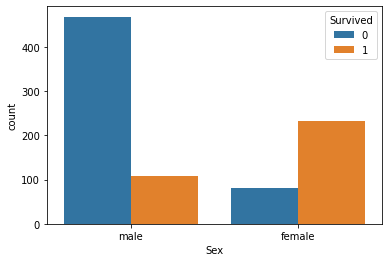

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=datas['Sex'], hue=datas['Survived'])

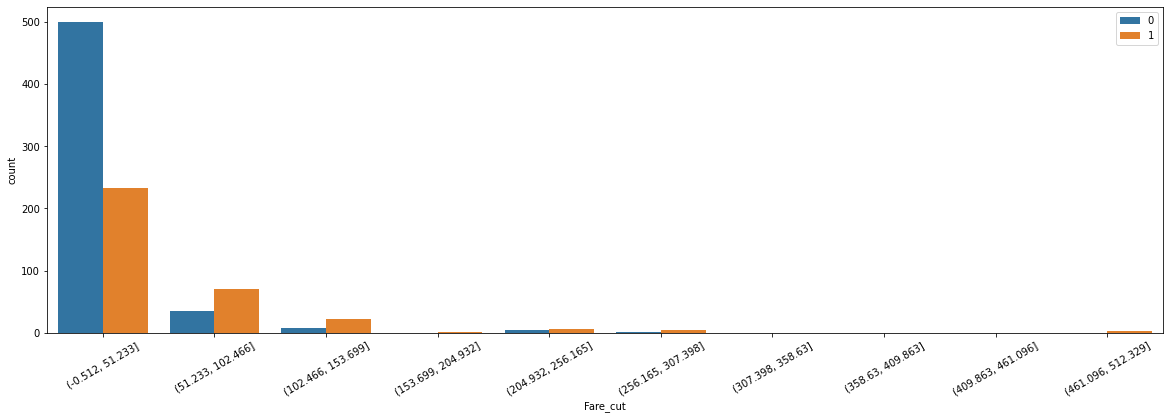

In [31]:
plt.figure(figsize=(20,6))
datas['Fare_cut'] = pd.cut(datas['Fare'], bins=10)
sns.countplot(x=datas['Fare_cut'], hue=datas['Survived'])
plt.xticks(rotation=30)
plt.legend(loc='upper right')

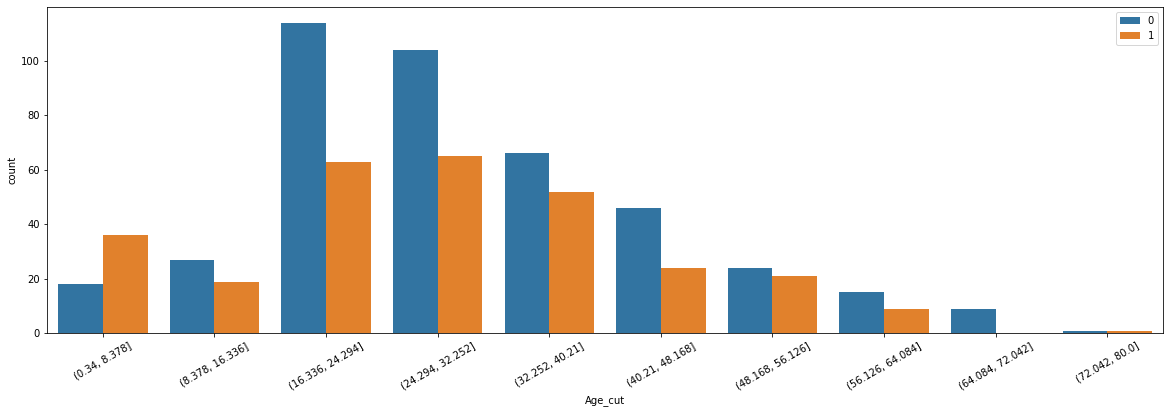

In [32]:
plt.figure(figsize=(20,6))
datas['Age_cut'] = pd.cut(datas['Age'], bins=10)
sns.countplot(x=datas['Age_cut'], hue=datas['Survived'])
plt.xticks(rotation=30)
plt.legend(loc='upper right')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combine_scale = scaler.fit_transform(combine)
combine_scale = pd.DataFrame(combine_scale)
combine_scale

In [ ]:
x_scale = combine_scale.iloc[:len(datas)]
x_scale = np.array(x_scale)
y_scale = datas["Survived"]
y_scale = np.array(y_scale)
x_predict_scale = combine_scale.iloc[len(datas):]
x_predict_scale = np.array(x_predict_scale)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2, 100)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)

In [ ]:
# 平常我就是7, 但我現在靠點運氣
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)
result